In [33]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt



In [34]:
image = Image.open("bungamatahari.jpg").convert("RGB")
image_np = np.array(image)

In [35]:
h, w, c = image_np.shape

In [36]:
palette = np.array([
    [0, 0, 0],       # Hitam
    [255, 0, 0],     # Merah
    [0, 0, 255],     # Biru
    [0, 255, 0]      # Hijau
])

In [ ]:

# membuat array kosong , untuk menampung angka indeks yang mewakili warna pallet
gambar_diindeks = np.zeros((h, w))


In [38]:
for i in range(h):
    for j in range(w):
        pixel = image_np[i, j]
        jarak = []
        for warna in palette:
            r_diff = warna[0] - pixel[0]  
            g_diff = warna[1] - pixel[1]  
            b_diff = warna[2] - pixel[2]  
            # rumus perhitungan 
            dist = np.sqrt(r_diff**2 + g_diff**2 + b_diff**2)
            jarak.append(dist)
        jarak = np.array(jarak)
        indeks_warna_terdekat = np.argmin(jarak)
        gambar_diindeks[i, j] = indeks_warna_terdekat

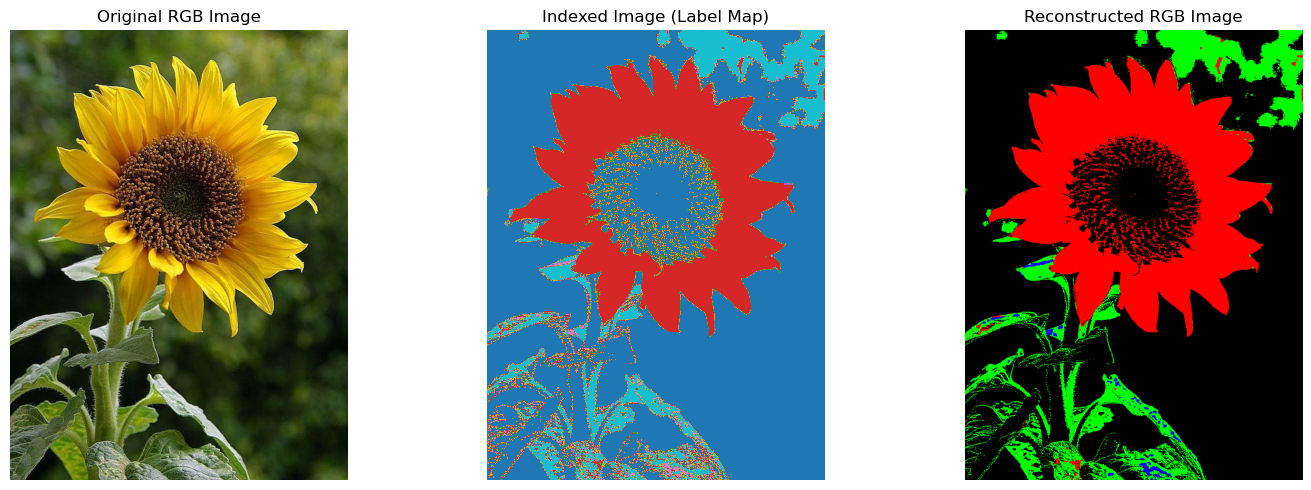

In [39]:

# Visualisasi
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original RGB Image")
plt.imshow(image_np)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Indexed Image (Label Map)")
plt.imshow(gambar_diindeks, cmap='tab10')
plt.axis('off')

# Rekonstruksi gambar dari palette
reconstructed_image = np.zeros_like(image_np)
for idx in range(len(palette)):
    mask = gambar_diindeks == idx
    reconstructed_image[mask] = palette[idx]

plt.subplot(1, 3, 3)
plt.title("Reconstructed RGB Image")
plt.imshow(reconstructed_image)
plt.axis('off')
plt.tight_layout()
plt.show()